# Demo of API usage of the Prox Rigid Body Simulator Procedural API

In [1]:
%matplotlib widget

First we make sure to import all modules that is needed.

In [2]:
import numpy as np
import rainbow.math.vector3 as V3
import rainbow.math.quaternion as Q
import rainbow.simulators.prox_rigid_bodies.api as API
import rainbow.simulators.prox_rigid_bodies.solver as SOLVER
import rainbow.simulators.prox_rigid_bodies.procedural as PROC
import rainbow.util.viewer as VIEWER

First we need a rigid body engine

In [3]:
engine = API.create_engine()

Second we create a scene using our subset of procedural generation methods. These makes it easy to quickly setup an environment in the same way, and they provide one with easy controllable parameterss for changing the loock and feel as well as the size of the scene being simulated.

In [4]:
def setup_scene(scene_name: str):
    PROC.create_ground(engine, V3.zero(), Q.identity(), density=1.0, material_name='default');
    
    if scene_name == "pillar":
        PROC.create_pillar(engine,
                  r = V3.zero(),
                  q = Q.identity(),
                  width = 1.0,
                  height = 5.0,
                  depth = 1.0,
                  stones = 3,
                  density=1.0,
                  material_name='default'
                  );
    elif scene_name == "arch":
        PROC.create_arch(engine,
                 r = V3.zero(),
                 q = Q.identity(),
                 width = 2.0,
                 height = 3.0,
                 depth = 0.5,
                 pier_stones=3,
                 arch_stones=5,
                 density = 1.0,
                 material_name='default'
                )
    elif scene_name == "dome":
        PROC.create_dome(engine,
                 r = V3.zero(),
                 q = Q.identity(),
                 outer_radius = 5.0,
                 inner_radius = 4.0,
                 layers = 4,
                 segments = 11,
                 density = 1.0,
                 material_name = 'default'
                )
    elif scene_name == "tower":
        PROC.create_tower(engine,
                  r = V3.zero(),
                  q = Q.identity(),
                  outer_radius = 5.0,
                  inner_radius = 4.0,
                  height = 8.0,
                  layers = 6,
                  segments = 11,
                  use_cubes = False,
                  density = 1.0,
                  material_name = 'default'
                 )
    elif scene_name == "colosseum":
        PROC.create_colosseum(engine,
                      r = V3.zero(),
                      q = Q.identity(),
                      outer_radius = 5.0,
                      inner_radius = 4.0,
                      height = 7.0,
                      levels = 3,
                      arches = 12,
                      density = 1.0,
                      material_name = 'default'
                     )
    elif scene_name == "pantheon":
        PROC.create_pantheon(engine,
                     r = V3.zero(),
                     q = Q.identity(),
                     outer_radius = 5.0,
                     inner_radius = 4.0,
                     height = 8.0,
                     layers=4,
                     segments=11,
                     density=1.0,
                     material_name='default'
                    )
    elif scene_name == "funnel":
        PROC.create_funnel(engine,
                   funnel_height = 4.0,
                   funnel_radius = 4.0,
                   grid_width = 2.0,
                   grid_height = 2.0,
                   grid_depth = 2.0,
                   I = 4,
                   J = 4,
                   K = 4,
                   density = 1.0,
                   material_name='default'
                  )
    elif scene_name == "glasses":
        PROC.create_glasses(engine,
                   glass_height = 4.0,
                   glass_radius = 2.0,
                   grid_width = 3.0,
                   grid_height = 3.0,
                   grid_depth = 3.0,
                   I=4,
                   J=4,
                   K=4,
                   density=1.0,
                   material_name='default'
                   )
    elif scene_name == "poles":
        PROC.create_poles(engine,
                 pole_height = 2.0,
                 pole_radius = 0.1,
                 I_poles = 6,
                 K_poles = 6,
                 grid_width = 4.0,
                 grid_height = 4.0,
                 grid_depth = 4.0,
                 I_grid = 4,
                 J_grid = 4,
                 K_grid = 4,
                 density = 1.0,
                 material_name = 'default'
                 )
    elif scene_name == "temple":
        PROC.create_temple(engine,
                  I_pillars = 4,
                  K_pillars = 7,
                  pillar_width = 1.0,
                  pillar_height = 3.0,
                  pillar_depth = 1.0,
                  pillar_stones = 3,
                  density = 1.0,
                  material_name = 'default'
                  )

In [5]:
setup_scene("pillar")

Next we create a viewer object that will be responsible for showing the procedural generated scene.

In [6]:
viewer = VIEWER.Viewer()
for body in engine.bodies.values():
    opacity = 0.5
    color = V3.make(1.0,0.1,0.1)
    viewer.create_mesh(body.name, body.shape.mesh.V, body.shape.mesh.T, color, opacity)
    viewer.place_mesh(body.name, body.r, body.q)
    
viewer.show()

Renderer(camera=PerspectiveCamera(aspect=1.25, children=(DirectionalLight(color='white', intensity=0.6, positi…

Finally we can run the simulation

In [7]:
def simulation(viewer, engine, monitor=True) -> None:
    dt = engine.params.time_step
    T = 0.1 # Total time
    fps = 1.0/dt
    steps = int(np.round(T*fps))    
    for i in range(steps):
        for body in engine.bodies.values():
            viewer.place_mesh(body.name, body.r, body.q)
        API.simulate(engine, dt, monitor)
        
simulation(viewer, engine, True)
stats = API.get_log(engine)

In [8]:
print(stats)

[{'update_bvh': 0.0075021248776465654, 'narrow_phase': 0.01289987494237721, 'number_of_overlaps': 3688, 'model_space_update': 0.002870334777981043, 'contact_optimization': 0.14911934593692422, 'contact_point_generation': 0.003751529846340418, 'contact_determination': 0.15860874997451901, 'contact_point_reduction': 5.666702054440975e-05, 'collision_detection_time': 0.17914208304136992, 'gauss_seidel_residuals': array([ 0., inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf

In [9]:
import matplotlib.pyplot as plt

colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
          '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff',
          '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1',
          '#000075', '#808080', '#ffffff', '#000000']

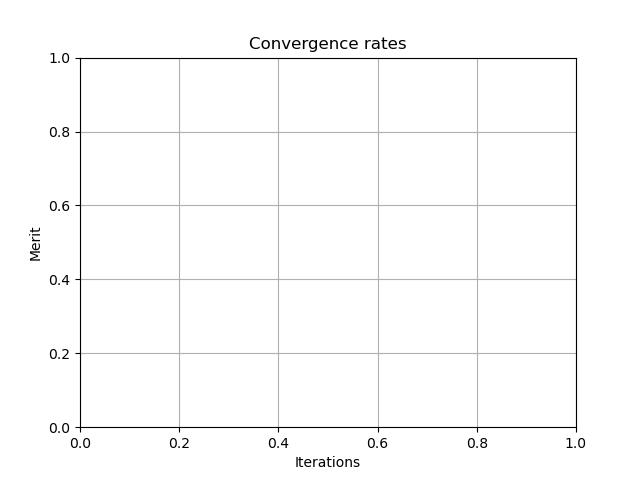

In [10]:
fig = plt.figure()
ax = plt.subplot(111)
ax.set_title('Convergence rates')
ax.set_xlabel('Iterations')
ax.set_ylabel('Merit')
plt.grid(True)
for i in range(len(stats)):
    data = stats[i]
    if 'residuals' in data.keys():
        residuals = data['residuals']
        reject = data['reject']
        ax.plot( residuals[np.where(reject==False)])
plt.show()

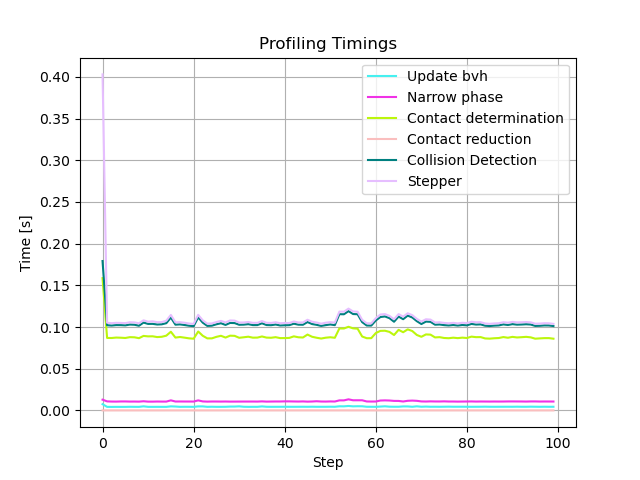

In [11]:
time_update_bvh = [ stats[i]['update_bvh'] for i in range(len(stats)) ]
time_narrow_phase = [ stats[i]['narrow_phase'] for i in range(len(stats)) ]
time_contact_determination = [ stats[i]['contact_determination'] for i in range(len(stats)) ]
time_contact_point_reduction = [ stats[i]['contact_point_reduction'] for i in range(len(stats)) ]
time_collision_detection = [ stats[i]['collision_detection_time'] for i in range(len(stats)) ]

time_stepper = [ stats[i]['stepper_time'] for i in range(len(stats)) ]


fig = plt.figure()
ax = plt.subplot(111)
ax.set_title('Profiling Timings')
ax.set_xlabel('Step')
ax.set_ylabel('Time [s]')
plt.grid(True)
ax.plot(time_update_bvh, label='Update bvh', color=colors[6])
ax.plot(time_narrow_phase, label='Narrow phase', color=colors[7])
ax.plot(time_contact_determination, label='Contact determination', color=colors[8])
ax.plot(time_contact_point_reduction, label='Contact reduction', color=colors[9])
ax.plot(time_collision_detection, label='Collision Detection', color=colors[10])
ax.plot(time_stepper, label='Stepper', color=colors[11])
ax.legend()
plt.show()

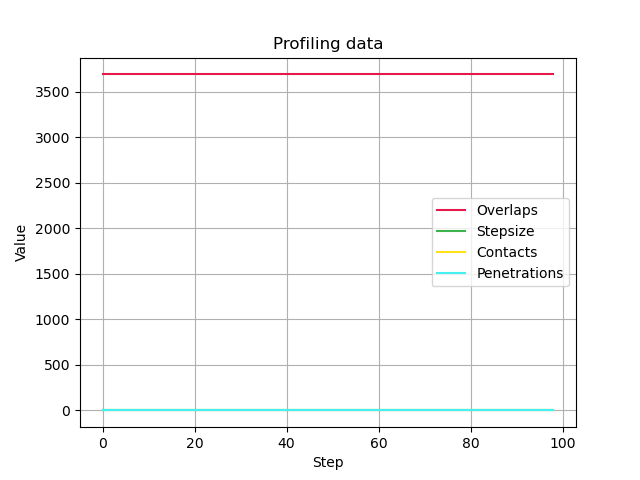

In [12]:
number_of_overlaps = [ stats[i]['number_of_overlaps'] for i in range(1, len(stats)) ]
step_sizes = [ stats[i]['dt'] for i in range(1, len(stats)) ]
number_of_contact_points = [ stats[i]['contact_points'] for i in range(1, len(stats)) ]
penetrations = [ stats[i]['max_penetration'] for i in range(1, len(stats)) ]

fig = plt.figure()
ax = plt.subplot(111)
ax.set_title('Profiling data')
ax.set_xlabel('Step')
ax.set_ylabel('Value')
plt.grid(True)
ax.plot(number_of_overlaps, label='Overlaps', color=colors[0])
ax.plot(step_sizes, label='Stepsize', color=colors[1])
ax.plot(number_of_contact_points, label='Contacts', color=colors[2])
ax.plot(penetrations, label='Penetrations', color=colors[6])
ax.legend()
plt.show()

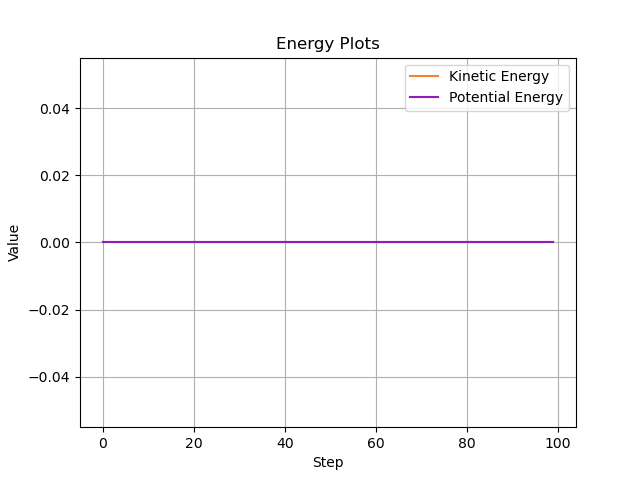

In [13]:
kinetic_energy = [ stats[i]['kinetic_energy'] for i in range(len(stats)) ]
potential_energy = [ stats[i]['potential_energy'] for i in range(len(stats)) ]

fig = plt.figure()
ax = plt.subplot(111)
ax.set_title('Energy Plots')
ax.set_xlabel('Step')
ax.set_ylabel('Value')
plt.grid(True)
ax.plot(kinetic_energy, label='Kinetic Energy', color=colors[4])
ax.plot(potential_energy, label='Potential Energy', color=colors[5])
ax.legend()
plt.show()